In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
boston = pd.read_csv("BostonHousing.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#boston["medv"] = boston.target
#Linear Regression
X = boston[["lstat", "rm"]]
Y = boston["medv"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [5]:
lr_new = lr()
lr_new.fit(x_train, y_train)

LinearRegression()

In [6]:
ytestpredict = lr_new.predict(x_test)
rootmeansquareerror = (np.sqrt(mean_squared_error(y_test,ytestpredict)))
print(rootmeansquareerror)

5.137400784702911


In [7]:
#PolynomialFeatures implementation
PolyFeatures = PolynomialFeatures(degree = 2)
xtrainpoly = PolyFeatures.fit_transform(x_train)
polymodel = lr()
polymodel.fit(xtrainpoly, y_train)
xtestpoly =  PolyFeatures.fit_transform(x_test)
ytestpredict_poly = polymodel.predict(xtestpoly)
rootmeansquareerror_poly = (np.sqrt(mean_squared_error(y_test, ytestpredict_poly)))
print(rootmeansquareerror_poly)

3.7848198845450303


In [9]:
lstat = boston["lstat"]
medv = boston["medv"]
rm = boston["rm"]

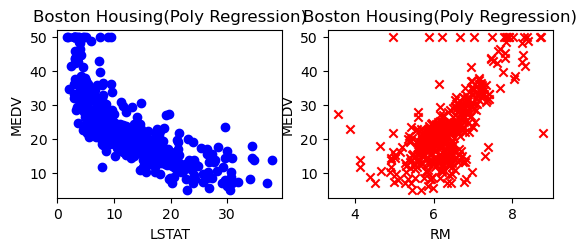

In [12]:
plt.subplot(221)
plt.scatter(x = lstat, y = medv, color = "blue", marker = "o")
plt.title("Boston Housing(Poly Regression)")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.subplot(222)
plt.scatter(x = rm, y = medv, color = "red", marker = "x")
plt.title("Boston Housing(Poly Regression)")
plt.xlabel("RM")
plt.ylabel("MEDV")



plt.show()